<a href="https://colab.research.google.com/github/justin6677/data_science/blob/main/%E6%9C%9F%E4%B8%AD%E9%9B%BB%E5%8B%95%E8%BB%8A%E5%A0%B1%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##data

###install package and data

In [ ]:
%pip install --pre pycaret[full] -qq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import matplotlib.pyplot as mp

In [ ]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df_copy = df.copy()
df_copy.shape

(135038, 17)

In [ ]:
df_copy.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [ ]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64


In [ ]:
#刪除缺失值  郵遞區號 車輛登記的立法區 車輛位置 電力續航里程 2020 年人口普查區域  製造商的建議零售價
df_copy = df_copy.dropna(subset=[
    'Postal Code', 'Legislative District',
    'Vehicle Location', 'Electric Utility',
    '2020 Census Tract','Electric Range',
    'Base MSRP'               ]) #Textual data
df_copy.shape


(134723, 17)

In [ ]:
print(df_copy['County'].value_counts().head())
print(df_copy['City'].value_counts())

County
King         70842
Snohomish    15258
Pierce       10410
Clark         7991
Thurston      4851
Name: count, dtype: int64
City
Seattle           23489
Bellevue           6959
Redmond            4965
Vancouver          4819
Kirkland           4201
                  ...  
Uniontown             1
Kenn                  1
Copalis Beach         1
Vantage               1
Bridgeport Bar        1
Name: count, Length: 454, dtype: int64


In [ ]:
df_copy = df_copy.drop('County', axis=1)

In [ ]:
city_mode = df_copy['City'].mode()[0]
print(city_mode)
df_copy.fillna(city_mode, inplace=True)

Seattle


In [ ]:
#City<5的合併 651row -> 329row
city_counts = df_copy['City'].value_counts()
cities_to_merge = city_counts[city_counts < 5].index
df_copy['City'] = df_copy['City'].apply(lambda x: 'Other' if x in cities_to_merge else x)
City_counts_new = df_copy['City'].value_counts()
City_counts_new

,count
City,
Seattle,23489
Bellevue,6959
Redmond,4965
Vancouver,4819
Kirkland,4201
...,...
Mabton,5
Union Gap,5
Outlook,5


In [ ]:
#刪除缺失值  郵遞區號 車輛登記的立法區 車輛位置 電力續航里程
# 2020 年人口普查區域 電力續航里程 製造商的建議零售價
df_cleaned = df_copy.dropna(subset=[
    'Postal Code','Legislative District',
    'Vehicle Location', 'Electric Utility',
    '2020 Census Tract','Electric Range',
    'Base MSRP'               ])
df_cleaned.shape


(134723, 16)

In [ ]:
model_counts = df_copy['Model'].value_counts()
model_counts

,count
Model,
MODEL 3,25752
MODEL Y,23531
LEAF,13008
MODEL S,7455
BOLT EV,5414
...,...
GV70,2
FLYING SPUR,1
918,1


In [ ]:
model_mode = df_copy['Model'].mode()[0]

In [ ]:
#合併model<5的 126->116
models_to_merge = model_counts[model_counts < 5].index
df_copy['Model'] = df_copy['Model'].apply(lambda x: 'Other' if x in models_to_merge else x)
model_counts_new = df_copy['Model'].value_counts()
model_counts_new

,count
Model,
MODEL 3,25752
MODEL Y,23531
LEAF,13008
MODEL S,7455
BOLT EV,5414
...,...
A7,10
ACCORD,9
G80,8


In [ ]:
# impute missing values for 'Model' columns
df_copy.fillna({'Model':model_mode}, inplace=True)
missing_model_values = df_copy['Model'].isnull().sum()
missing_model_values

0

In [ ]:
missing_values = df_copy.isnull().sum()
print(missing_values)

VIN (1-10)                                           0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [ ]:
df_copy.loc[:,['Model Year']].value_counts().head()

,count
Model Year,
2022,27919
2023,22458
2021,18478
2018,14314
2020,11119


In [ ]:
df_copy.loc[:,['Base MSRP']].value_counts().head()

,count
Base MSRP,
0.0,131304
69900.0,1430
31950.0,400
52900.0,214
32250.0,152


In [ ]:
df_copy.loc[:,['Electric Range']].value_counts().head()

,count
Electric Range,
0.0,56867
215.0,6422
220.0,4150
84.0,4036
238.0,3508


In [ ]:
kk= df_copy.loc[:,"Electric Range"]==0
df2=df_copy.loc[kk]
df2.loc[:,"Model Year"].value_counts()

,count
Model Year,
2022,23754
2023,18609
2021,14429
2020,57
2024,15
2019,3


In [ ]:
#檢查電力續航里程
Electric_Range_counts = df_copy['Electric Range'].value_counts()
Electric_Range_counts.tail()


,count
Electric Range,
51.0,4
95.0,3
57.0,1
11.0,1
59.0,1


In [ ]:
p=df_cleaned['Electric Range'].value_counts()
pk = p[p >= 5].index

In [ ]:
a1=df_copy[(df_copy['Electric Range'] !=0) | (df_copy['Base MSRP'] !=0) ]
a2=df_copy[(df_copy['Electric Range'] !=0) ]
print(a1.count()==a2.count())

VIN (1-10)                                           True
City                                                 True
State                                                True
Postal Code                                          True
Model Year                                           True
Make                                                 True
Model                                                True
Electric Vehicle Type                                True
Clean Alternative Fuel Vehicle (CAFV) Eligibility    True
Electric Range                                       True
Base MSRP                                            True
Legislative District                                 True
DOL Vehicle ID                                       True
Vehicle Location                                     True
Electric Utility                                     True
2020 Census Tract                                    True
dtype: bool


根據上述結果，可以知道Electric Range=0的時候，Base MSRP也會是0，代表是因為可能是新車或是沒有相關數據才會填上0。  
所以考慮是否刪除Electric Range=0的index



In [ ]:
import pandas as pd
from scipy import stats

# 2. Set the significance level (alpha):
alpha = 0.01


t_statistic, p_value = stats.ttest_1samp(df_copy['Electric Range'], 0)  # Replace 250 with your specific value

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The average Electric Range is significantly different from 0 miles.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the average Electric Range is different from 0 miles.")

Reject the null hypothesis.
The average Electric Range is significantly different from 0 miles.


In [ ]:
#刪除電力續航里程為0的
df_cleaned = df_copy[(df_copy['Electric Range'] !=0) | (df_copy['Base MSRP'] !=0) ]
df_cleaned = df_cleaned[df_cleaned['Electric Range'].isin(pk)]
df_cleaned.shape

(77834, 16)

In [ ]:
#檢查電力續航里程
Electric_Range_counts = df_cleaned['Electric Range'].value_counts()
Electric_Range_counts.head()


,count
Electric Range,
215.0,6422
220.0,4150
84.0,4036
238.0,3508
25.0,3231


In [ ]:
make_counts = df_cleaned['Make'].value_counts()
make_counts.head()

,count
Make,
TESLA,25803
NISSAN,11042
CHEVROLET,8681
BMW,4991
TOYOTA,4798


In [ ]:
make_to_merge = make_counts[make_counts < 10].index
df_cleaned['Make'] = df_cleaned['Make'].apply(lambda x: 'Other' if x in make_to_merge else x)
make_counts_new = df_cleaned['Make'].value_counts()
make_counts_new.shape

(30,)

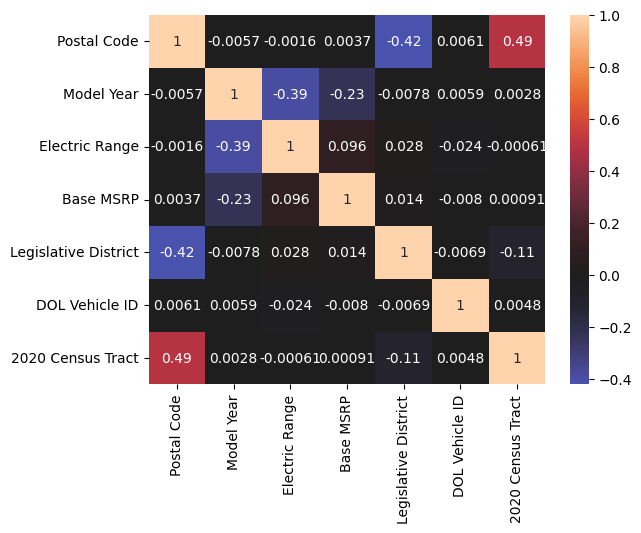

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
df_corr = numeric_df.corr()
seaborn.heatmap(df_corr, center=0, annot=True)
mp.show()

##scaling

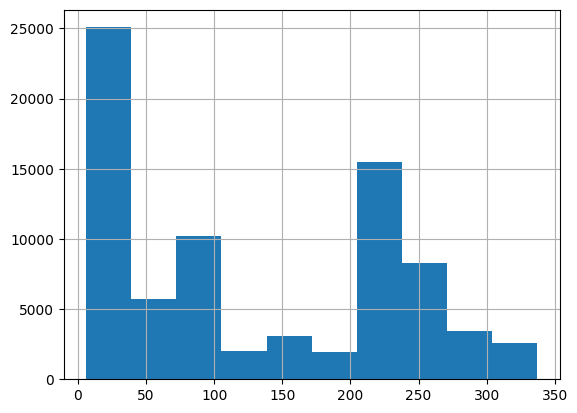

In [ ]:
df_cleaned["Electric Range"].hist();

In [ ]:
#標準化Electric Range
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
scaler = StandardScaler()
scaler.fit(df_cleaned[['Electric Range']])
df_cleaned['Electric Range_standardized'] = scaler.transform(df_cleaned[['Electric Range']])

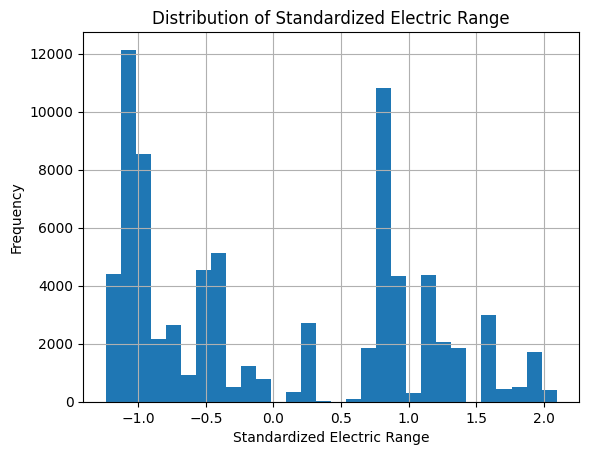

In [ ]:
plt.hist(df_cleaned['Electric Range_standardized'], bins=30)  # Adjust the number of bins as needed
plt.xlabel('Standardized Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Standardized Electric Range')
plt.grid(True)
plt.show()

In [ ]:
# Electric Range 取log
df_cleaned['Electric Range_transformed'] = np.log1p(df_copy['Electric Range'])

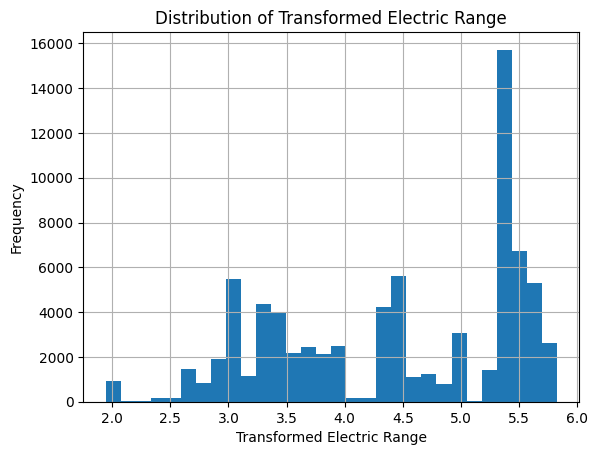

In [ ]:
plt.hist(df_cleaned['Electric Range_transformed'], bins=30)
plt.xlabel('Transformed Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Transformed Electric Range')
plt.grid(True)
plt.show()

In [ ]:
transformer2 = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
t_data=transformer2.fit_transform(df_cleaned[['Electric Range']])


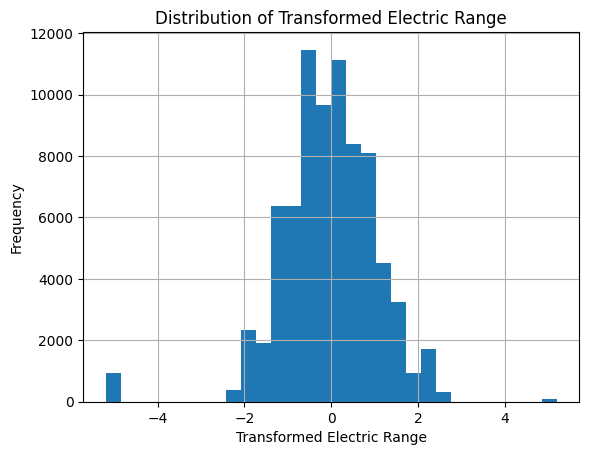

In [ ]:
plt.hist(t_data, bins=30)
plt.xlabel('Transformed Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Transformed Electric Range')
plt.grid(True)
plt.show()

In [ ]:
pt = PowerTransformer(method='box-cox')
t1_data = pt.fit_transform(df_cleaned[['Electric Range']])

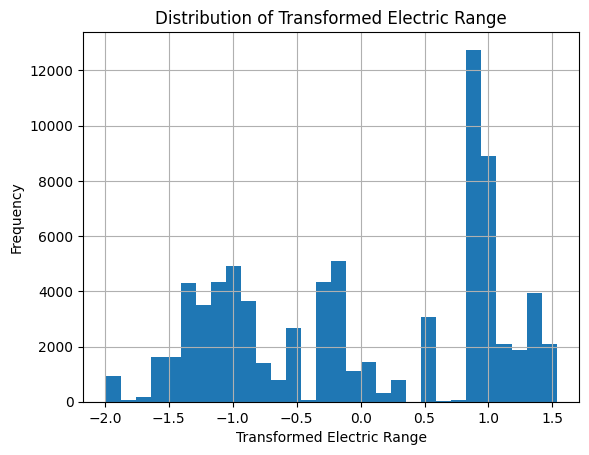

In [ ]:
plt.hist(t1_data, bins=30)
plt.xlabel('Transformed Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Transformed Electric Range')
plt.grid(True)
plt.show()

經由上述傳換可以看出QuantileTransformer最接近鐘形分布，所以使用QuantileTransformer

In [ ]:
df_cleaned.loc[:,['Electric Range Quantile']]=t_data

##encoding

In [ ]:
from sklearn.preprocessing import TargetEncoder
enc_auto = TargetEncoder(smooth="auto",cv=5,categories='auto',target_type='continuous')
df_Make_encoded = enc_auto.fit(df_cleaned.loc[:,['Make',"Model"]],df_cleaned['Electric Range'])
df_cleaned.loc[:,["Make_encode","Model_encode"]]=df_Make_encoded.transform(df_cleaned[['Make',"Model"]])

In [ ]:
df_cleaned.loc[:,["Make_encode","Model_encode"]]

,Make_encode,Model_encode
0,240.476757,238.176572
2,240.476757,238.176572
3,240.476757,238.176572
4,240.476757,226.651642
5,47.429125,90.046750
...,...,...
135029,127.724953,45.322007
135030,22.243495,21.763181
135032,240.476757,238.176572
135033,240.476757,226.651642


##視覺化


<ipython-input-42-0f82ea55426a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_by_year.index, y = df_by_year.values, palette = 'bright')


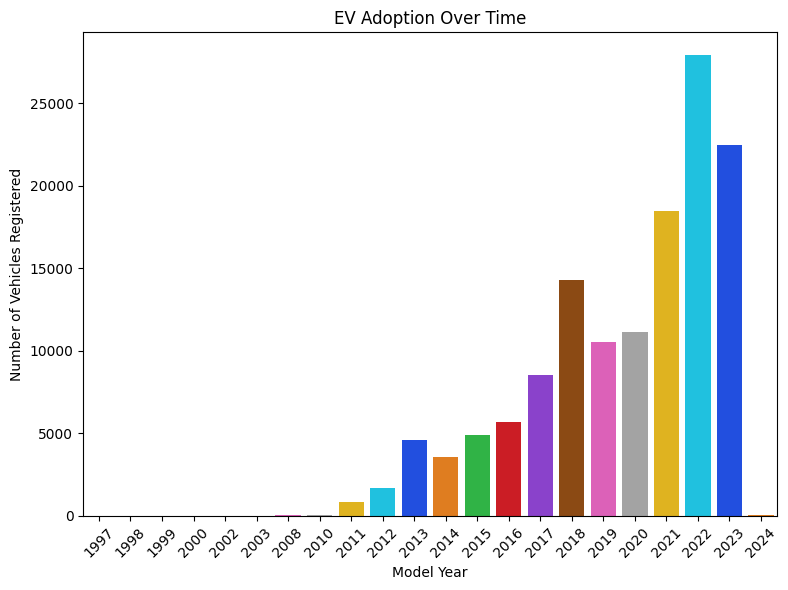

In [ ]:
#年份分布圖
plt.figure(figsize = (8,6))
df_by_year = df_copy['Model Year'].value_counts().sort_index()
sns.barplot(x = df_by_year.index, y = df_by_year.values, palette = 'bright')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


<ipython-input-43-78973645a844>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_counts.index, y=make_counts.values, palette='bright', order=make_counts.index)


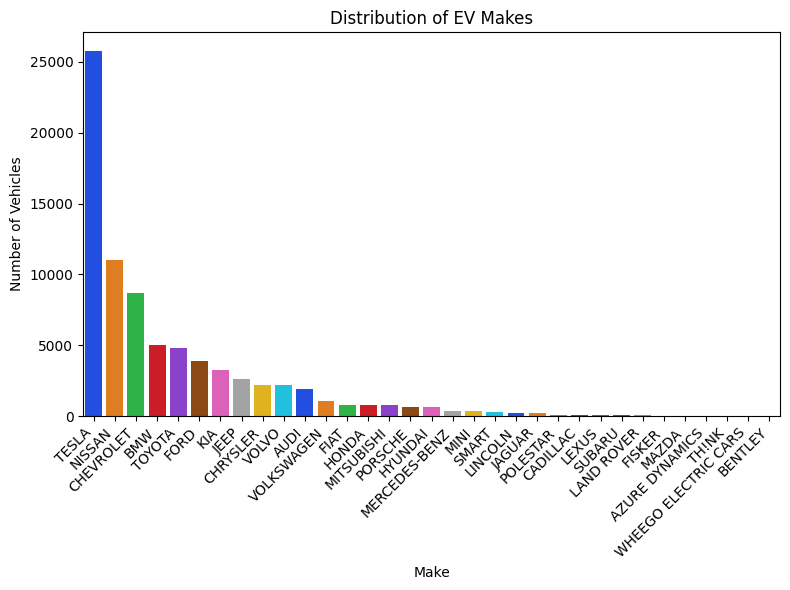

In [ ]:
#製造商分布圖
plt.figure(figsize=(8, 6))
sns.barplot(x=make_counts.index, y=make_counts.values, palette='bright', order=make_counts.index)
make_counts = df_cleaned['Make'].value_counts()
plt.title('Distribution of EV Makes')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

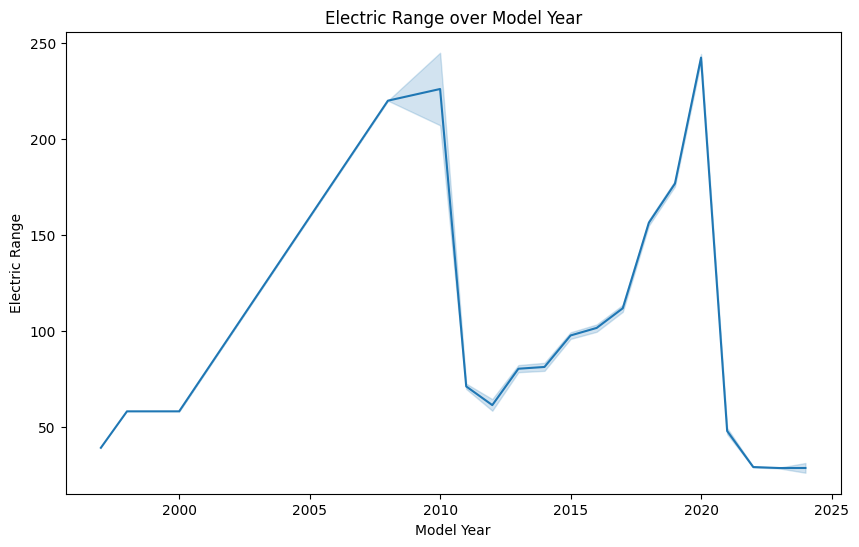

In [ ]:
# 年分 VS 電力里程
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=df_cleaned, ci='deprecated')
plt.title('Electric Range over Model Year')
plt.show()

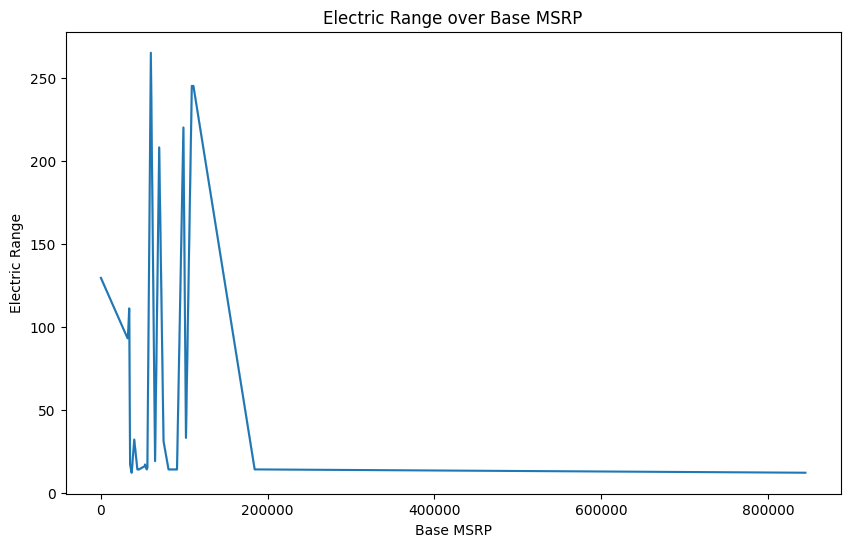

In [ ]:
# 建議零售價 VS 電力里程
plt.figure(figsize=(10, 6))
sns.lineplot(x='Base MSRP', y='Electric Range', data=df_cleaned, ci='deprecated')
plt.title('Electric Range over Base MSRP')
plt.show()

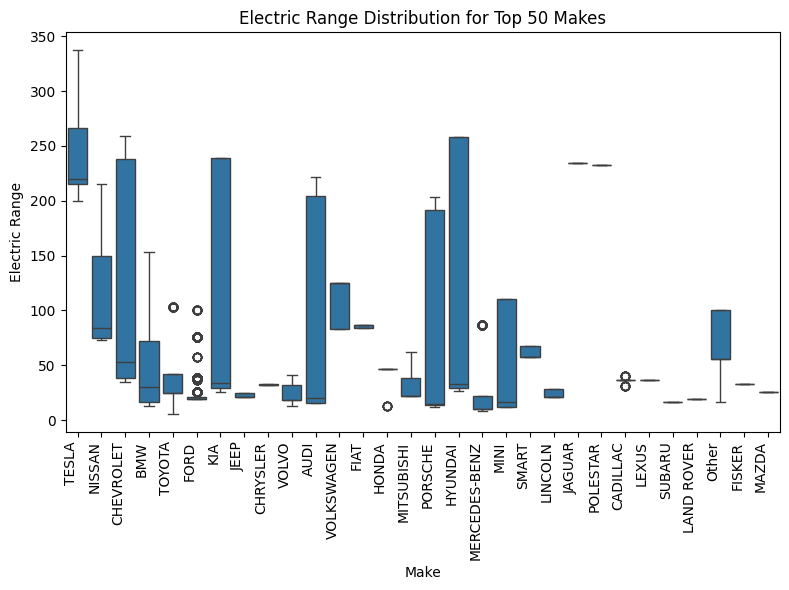

In [ ]:
#5	前50大製造商 VS 電力里程
top_50_makes = df_cleaned['Make'].value_counts().nlargest(50).index

filtered_df = df_cleaned[df_cleaned['Make'].isin(top_50_makes)]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Make', y='Electric Range', data=filtered_df, order=top_50_makes)

plt.title('Electric Range Distribution for Top 50 Makes')
plt.xlabel('Make')
plt.ylabel('Electric Range')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

##Model

使用pycaret建立模型

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_cleaned.loc[:,["Make_encode","Model_encode",'Electric Range Quantile',"Base MSRP"]]
#y = df_cleaned["Base MSRP"]
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
from pycaret.regression import *
from pycaret.regression import compare_models
filled_train_set=setup(data=X_train,
            target="Base MSRP",
            train_size=0.8,
            session_id=2024,
            numeric_features=["Make_encode","Model_encode",'Electric Range Quantile'],
            numeric_imputation="mean",
            max_encoding_ohe=10,
            normalize=True,
            )

,Description,Value
0,Session id,2024
1,Target,Base MSRP
2,Target type,Regression
3,Original data shape,"(62267, 4)"
4,Transformed data shape,"(62267, 4)"
5,Transformed train set shape,"(49813, 4)"
6,Transformed test set shape,"(12454, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


比較哪個模型最好

In [ ]:
best_model=compare_models(fold=3,n_select=5,sort="MAPE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1310.3102,72857472.0000,8488.5933,0.5552,1.6915,0.1427,0.4367
dt,Decision Tree Regressor,1343.1386,58984269.2877,7572.8048,0.6480,1.7531,0.2354,0.0900
et,Extra Trees Regressor,1348.7605,60661608.3091,7671.6131,0.6387,1.7575,0.2354,0.9133
xgboost,Extreme Gradient Boosting,1368.8053,72041702.6667,8381.2757,0.5613,1.8517,0.2355,0.2533
rf,Random Forest Regressor,1359.4464,65656429.4809,8007.0396,0.6041,1.7595,0.2359,0.9967
catboost,CatBoost Regressor,1359.3720,61425821.1533,7709.6886,0.6350,2.6263,0.2360,6.1033
lightgbm,Light Gradient Boosting Machine,1515.4294,64087424.3712,7879.5929,0.6189,3.8425,0.2580,0.9100
gbr,Gradient Boosting Regressor,2212.1759,74897830.0114,8580.4852,0.5477,5.6959,0.4136,1.1033
ada,AdaBoost Regressor,5948.2429,149777001.2104,12151.2615,0.0764,6.9045,0.6684,0.3833
lar,Least Angle Regression,4704.7153,159059194.6667,12572.3587,0.0240,7.3650,0.9364,0.1200


Processing:   0%|          | 0/89 [00:00<?, ?it/s]

In [ ]:
finalModel=create_model(best_model[0])
predict_model(finalModel,data=X_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1162.4377,57197556.0000,7562.9067,0.5777,1.1738,0.3586
1,1348.1312,50687816.0000,7119.5376,0.6583,1.4832,0.2406
2,1328.2222,47424956.0000,6886.5781,0.6724,1.7096,0.2902
3,1157.2285,42074288.0000,6486.4697,0.7087,1.3337,0.2014
4,1448.9093,54627188.0000,7391.0210,0.6688,1.8220,0.1976
5,1611.8070,54805616.0000,7403.0815,0.6417,1.9379,0.2002
6,1759.1333,193358672.0000,13905.3467,0.3634,1.8647,0.2170
7,1433.2975,49648736.0000,7046.1860,0.6657,1.9137,0.2169
8,1367.5088,49156288.0000,7011.1548,0.6608,1.8179,0.2174


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,1441.7606,51602144.0000,7183.4634,0.6645,1.8159,0.2008


,Make_encode,Model_encode,Electric Range Quantile,Base MSRP,prediction_label
129266,26.989639,25.000000,-0.927754,0.0,0.0
32514,97.236053,34.000000,-0.589456,0.0,0.0
8074,127.724953,243.619766,0.967422,0.0,0.0
106542,37.000000,37.000000,-0.554664,0.0,0.0
103074,24.945839,20.378393,-1.366707,0.0,0.0
...,...,...,...,...,...
21999,97.236053,93.000000,0.037988,0.0,31950.0
28569,240.476761,239.674454,0.255962,0.0,0.0
82738,240.476761,226.651642,1.399657,0.0,0.0
69887,127.724953,243.619766,1.220640,0.0,0.0


查看殘差圖

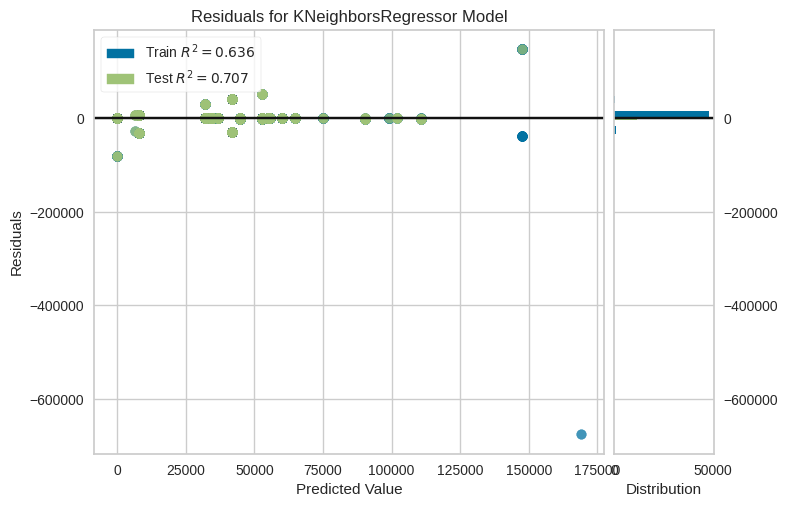

In [ ]:
plot_model(finalModel,plot="residuals")

查看模型解釋比例

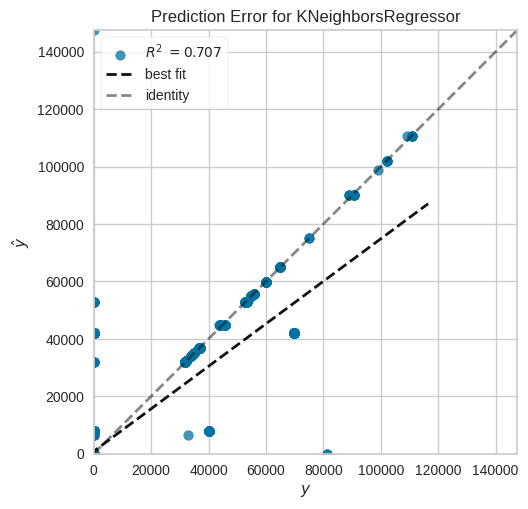

In [ ]:
plot_model(finalModel,plot="error")

查看模型score

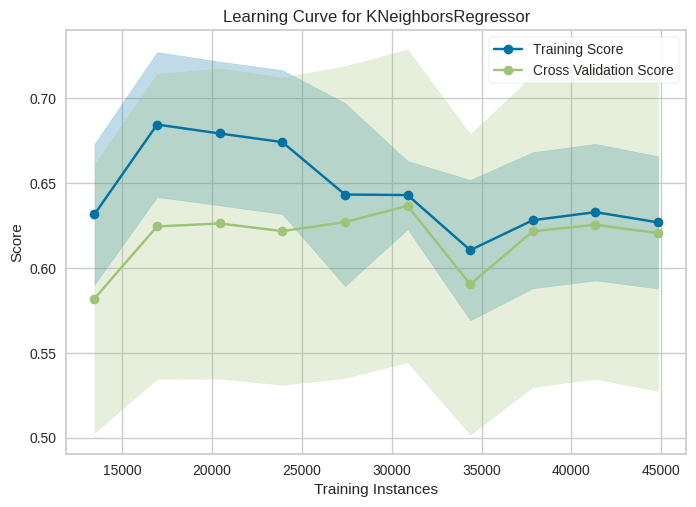

In [ ]:
plot_model(finalModel,plot="learning")